ERROR:root:File `'variables.ipynb.py'` not found.
ERROR:root:File `'utils.ipynb.py'` not found.
ERROR:root:File `'image_utils.ipynb.py'` not found.
ERROR:root:File `'global_variables.ipynb.py'` not found.


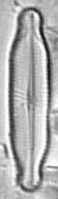

NameError: name 'split_img_list' is not defined

In [1]:
from pascal_voc_writer import Writer
from lxml import etree
from os import listdir
from os.path import isfile, join
import os
import cv2

%run ../utils_transform_dataset/generator.ipynb

In [2]:
ROOT = '/home/souhila/nvme-storage/data/'
#path destination
DATASET_PATH_TRAINVAL = os.path.join(ROOT + 'artificial/train_artificial/')
DATASET_PATH_TRAIN = os.path.join(DATASET_PATH_TRAINVAL + 'train/')
DATASET_PATH_VAL = os.path.join(DATASET_PATH_TRAINVAL + 'val/')
DATASET_PATH_TEST = os.path.join(ROOT + 'artificial/test_artificial/')

#
DATASET_PATH = [os.path.join(ROOT + 'origin/train_origin/train/')]
DATASET_DUST_PATH = [os.path.join(ROOT + 'origin/DUST/')]
PERCENTAGE_VAL = 0.1

In [5]:

def voc_writer(DATASET_PATH, img, xmin, ymin, xmax, ymax):
    # Writer(path, width, height)

    writer = Writer(os.path.join(DATASET_PATH + img + '.png'), 1000, 1000)

    # ::addObject(name, xmin, ymin, xmax, ymax)
    for objet in objets:
        writer.addObject('diatoms', xmin, ymin, xmax, ymax)

    # ::save(path)

    writer.save(os.path.join(DATASET_PATH + img + '.xml'))


In [6]:
import time
from sklearn.model_selection import train_test_split
ref = cv2.imread("/home/souhila/nvme-storage/ATLAS/RA_V3/ABRY/RA_ABRY_0001.png", cv2.IMREAD_GRAYSCALE)
display(Image.fromarray(ref))

diatom_images_train, diatom_images_val = split_img_list(list_images(DATASET_PATH, diatoms=True, ref=ref), PERCENTAGE_VAL)
debris_images_train, debris_images_val = split_img_list(list_images(DATASET_DUST_PATH, diatoms=False, ref=ref), PERCENTAGE_VAL)
start=time.time()
np.random.seed(20)
final_image, annotations = main_generator([diatom_images_train, debris_images_train],
                                          simple_angles = False, 
                                          size_px = 1000,
                                          verbose=False, 
                                          number_overlapping=1, 
                                          overlapping=.5, 
                                          n_diatoms=[9,12],
                                          scale_diatoms=[7,4.5],                                          
                                          n_dust=[25,40],
                                          scale_dust=[3,4])
print(time.time()-start, "s!")
display(Image.fromarray(final_image))                     
voc_writer(DATASET_PATH_TRAIN, img, bbox=[xmin, ymin, xmax, ymax])



SyntaxError: positional argument follows keyword argument (<ipython-input-6-40ffc1ea98cf>, line 22)